In [102]:
import kaggle.api

In [103]:
import os
os.getcwd()

'c:\\Users\\Hong\\Desktop\\Acorn_File'

In [171]:
dataset = 'hanaksoy/customer-purchasing-behaviors'  
kaggle.api.dataset_download_files(dataset, path='./', unzip=True)

import pandas as pd

data = pd.read_csv('Customer Purchasing Behaviors.csv')
print(data.head())

2024-09-17 21:35:49,547 WARNING Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'RemoteDisconnected('Remote end closed connection without response')': /api/v1/datasets/download/hanaksoy/customer-purchasing-behaviors?datasetVersionNumber=None


Dataset URL: https://www.kaggle.com/datasets/hanaksoy/customer-purchasing-behaviors
   user_id  age  annual_income  purchase_amount  loyalty_score region  \
0        1   25          45000              200            4.5  North   
1        2   34          55000              350            7.0  South   
2        3   45          65000              500            8.0   West   
3        4   22          30000              150            3.0   East   
4        5   29          47000              220            4.8  North   

   purchase_frequency  
0                  12  
1                  18  
2                  22  
3                  10  
4                  13  


In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [173]:
data.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [174]:
data.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [175]:
data.region.value_counts()

region
North    78
South    77
West     77
East      6
Name: count, dtype: int64

In [176]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data.region = encoder.fit_transform(data.region)

# 1 == North , 2 == South, 3 == West, 4 == East


In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap


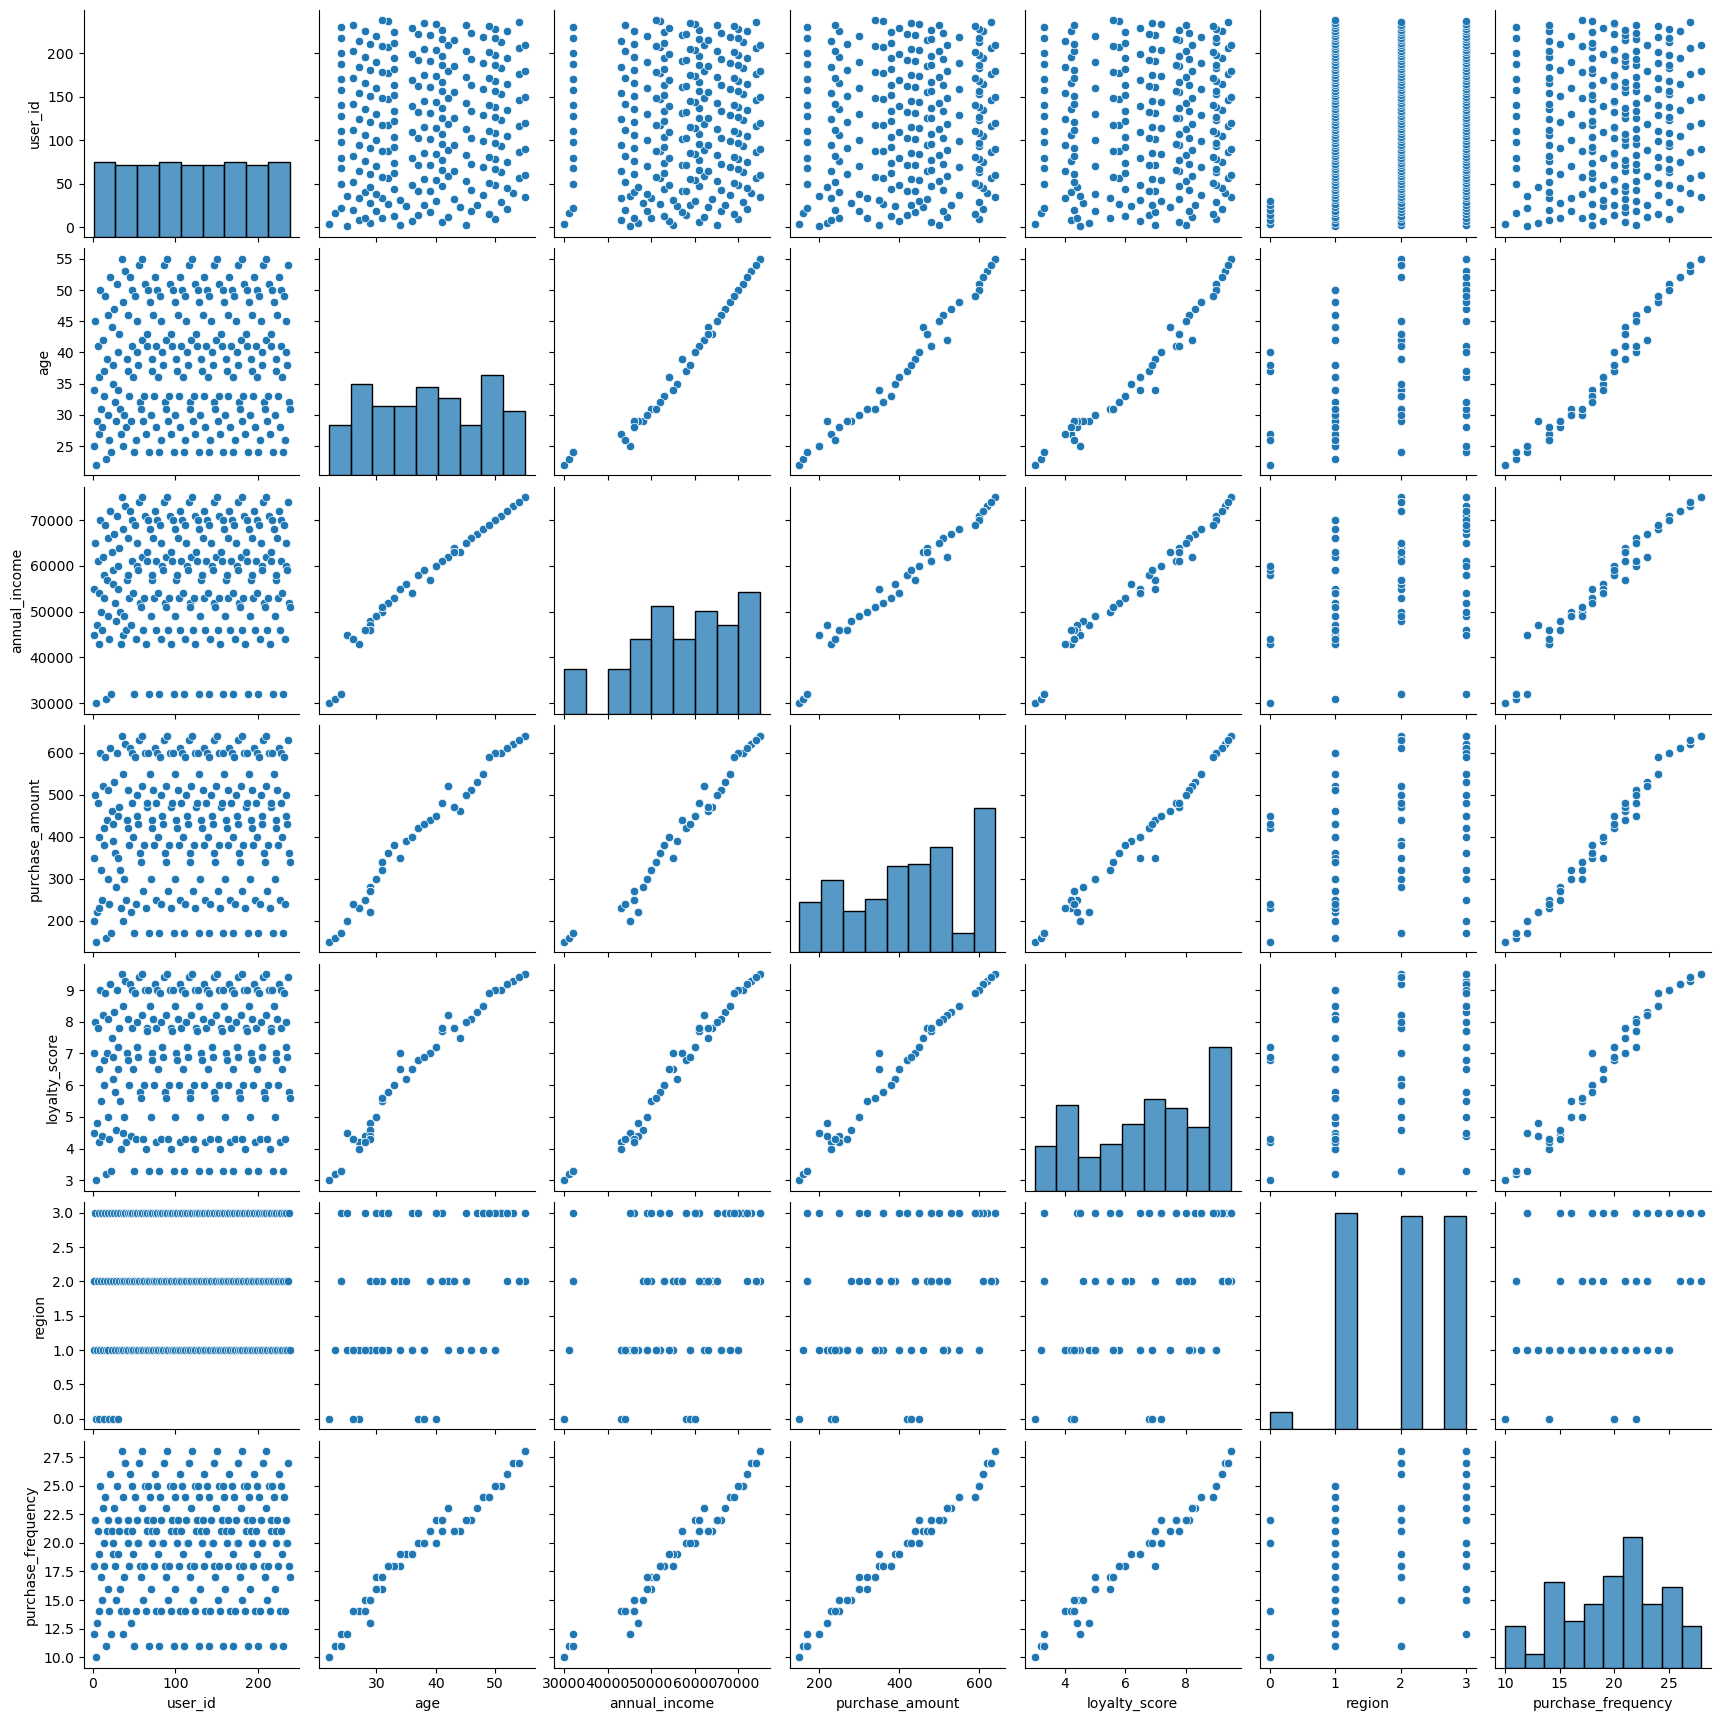

In [111]:
sns.pairplot(data)

In [112]:
data.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [178]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(data)
scaled_data = pd.DataFrame(scale.transform(data) ,columns = data.columns)
scaled_data

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,-1.724789,-1.465632,-1.090306,-1.614441,-1.210582,-1.092272,-1.712679
1,-1.710233,-0.501151,-0.211563,-0.541153,0.108642,0.063109,-0.394950
2,-1.695678,0.677658,0.667180,0.532134,0.636332,1.218490,0.483536
3,-1.681123,-1.787125,-2.408420,-1.972203,-2.002117,-2.247652,-2.151922
4,-1.666568,-1.036974,-0.914557,-1.471336,-1.052275,-1.092272,-1.493057
...,...,...,...,...,...,...,...
233,1.666568,0.141835,0.227809,0.174372,0.214180,1.218490,0.044293
234,1.681123,-0.072494,0.139934,0.031267,0.055873,-1.092272,0.044293
235,1.695678,1.642138,1.458049,1.462317,1.375097,0.063109,1.581644
236,1.710233,-0.715480,-0.475186,-0.469601,-0.524586,1.218490,-0.394950


<Axes: >

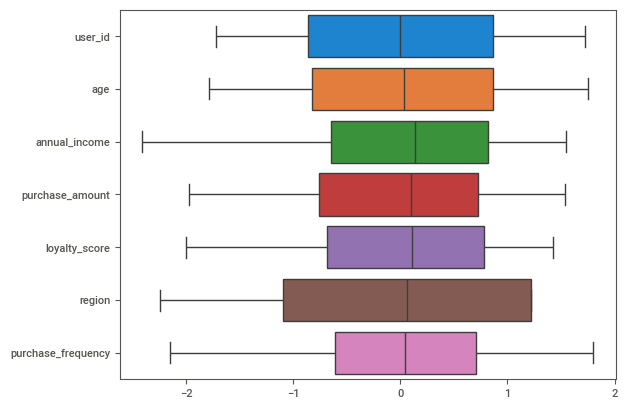

In [179]:
sns.boxplot(scaled_data, orient = 'h')



<Axes: >

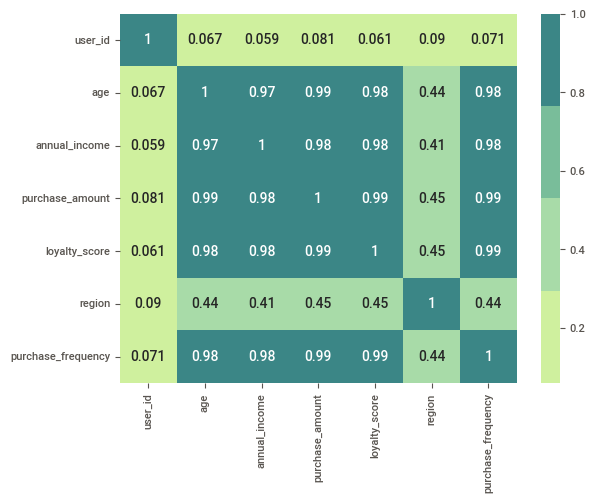

In [180]:
cmap = ListedColormap(['#cff09e','#a8dba8','#79bd9a','#3b8686'])
cor_data = data.corr()
sns.heatmap(cor_data, annot = True, cmap = cmap)

In [116]:
import time
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate,cross_val_score,RandomizedSearchCV,KFold
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, \
AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsRegressor

In [181]:
X = scaled_data.drop(['user_id','loyalty_score'], axis = 1)
y = scaled_data['loyalty_score']

In [182]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.625, random_state=42)

In [183]:
print(X_train.shape, X_val.shape, X_test.shape)

(118, 5) (72, 5) (48, 5)


In [184]:
train_score = []
val_score = []
test_score = []
def ML(model, param_grid):

    # Grid search function
    def Grid_set_(model, param_grid):
        start_time = time.time() 
        grid_search = GridSearchCV(model, param_grid, cv=KFold(n_splits=10), scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)
        end_time = time.time() 
        grid_search_time = end_time - start_time * 1000 
        print(f"Grid Search Time: {grid_search_time:.2f} seconds")
        
        best_model = grid_search.best_estimator_

        cv_scores = -cross_val_score(best_model, X_train, y_train, cv=KFold(n_splits=10), scoring='neg_mean_squared_error')
        print(f"***** {model.__class__.__name__} *****")
        print(f"Cross-validation MSE (Training): {cv_scores.mean():.2f}")
        print(f'Grid Search Best Score (negative MSE): {grid_search.best_score_:.2f}')
        return best_model, grid_search, cv_scores

    # Evaluate model (common for train, val, test)
    def evaluate_model(best_model, X, y):
        y_pred = best_model.predict(X)
        mse = mean_squared_error(y, y_pred)
        mae = mean_absolute_error(y, y_pred)
        r2 = r2_score(y, y_pred)
        return mse, mae, r2, y_pred
        
    # Train data evaluation
    def Train_set(best_model, X_train, y_train):
        start_time = time.time() 
        results = evaluate_model(best_model, X_train, y_train)
        end_time = time.time() 
        train_time = end_time - start_time * 1000
        print(f"Training Time: {train_time:.2f} seconds")
        return results

    # Validation data evaluation
    def Validation_set(best_model, X_val, y_val):
        start_time = time.time() 
        results = evaluate_model(best_model, X_val, y_val)
        end_time = time.time() 
        validation_time = end_time - start_time * 1000
        print(f"Validation Time: {validation_time:.2f} seconds")
        return results

    # Test data evaluation
    def Test_set(best_model, X_test, y_test):
        start_time = time.time()  
        results = evaluate_model(best_model, X_test, y_test)
        end_time = time.time() 
        test_time = end_time - start_time  * 1000
        print(f"Test Time: {test_time:.2f} seconds")
        return results


    # Bar graph data
    def Bar_Source():
        train_stats = [{
            'MSE_train': mse_train,
            'MAE_train': mae_train,
            'R2_train': r2_train,
            'Model': model.__class__.__name__
        }]
        train_score.append(train_stats)

        val_stats = [{
            'MSE_val': mse_val,
            'MAE_val': mae_val,
            'R2_val': r2_val,
            'Model': model.__class__.__name__
        }]
        val_score.append(val_stats)

        test_stats = [{
            'MSE_test': mse_test,
            'MAE_test': mae_test,
            'R2_test': r2_test,
            'Model': model.__class__.__name__
        }]
        test_score.append(test_stats)


    # Final results
    def Result_():
        results = {
            'Training': {
                'mse': mse_train,
                'mae': mae_train,
                'r2': r2_train,
                'predictions': y_train_pred
            },
            'Validation': {
                'mse': mse_val,
                'mae': mae_val,
                'r2': r2_val,
                'predictions': y_val_pred
            },
            'Test': {
                'mse': mse_test,
                'mae': mae_test,
                'r2': r2_test,
                'predictions': y_test_pred
            }
        }
        return results

    # Visualization & Output
    def output(results):
        for stage, result in results.items():
            print(f'*****{model.__class__.__name__}*****')
            print(f"Stage: {stage}")
            print(f"\nMSE: {result['mse']:.2f}")
            print(f"\nMAE: {result['mae']:.2f}")
            print(f"\nR^2 Score: {result['r2']:.2f}")
            print('\n')

    best_model, grid_search, cv_scores = Grid_set_(model, param_grid)

    # Run evaluations for Train, Validation, Test sets
    mse_train, mae_train, r2_train, y_train_pred = Train_set(best_model, X_train, y_train)
    mse_val, mae_val, r2_val, y_val_pred = Validation_set(best_model, X_val, y_val)
    mse_test, mae_test, r2_test, y_test_pred = Test_set(best_model, X_test, y_test)

    # Bar graph source update
    Bar_Source()

    # Results output
    results = Result_()
    output(results)

In [185]:
model = [LinearRegression(),   
         DecisionTreeRegressor(random_state = 42), 
         RandomForestRegressor(random_state= 42), 
         GradientBoostingRegressor(random_state= 42), 
         Lasso(random_state= 42), 
         Ridge(random_state= 42),  
         ElasticNet(random_state= 42), 
         SGDRegressor(random_state= 42),  
         KNeighborsRegressor(), 
         AdaBoostRegressor(random_state = 42), 
         BaggingRegressor(random_state = 42), 
         ExtraTreesRegressor(random_state= 42), 
         MLPRegressor(random_state= 42),
         SVR(),
         xgb.XGBRegressor(random_state = 42)] 


LR_params = {'fit_intercept' : [True]}
Tree_params = {'max_depth' : [5]}
RF_params = {'n_estimators' : [10, 50, 100], 'max_depth' : [3,5,10]}
GB_params = {'n_estimators' : [50, 100], 'learning_rate' : [0.01, 0.1]}
Lasso_params = {'alpha' : [0.1]}
Ridge_params = {'alpha' : [0.1], 'solver' : ['lsqr']}
Elastic_params = {'alpha' : [0.1]}
SGD_params = {'learning_rate' : ['constant']}
KNN_params = {'algorithm' : ['brute']}
Ada_params = {'n_estimators' : [10,50,100]}
Bagging_params = {'n_estimators' : [10,50,100]}
Extra_params = {'n_estimators' : [10, 50, 100]}
MLP_params = {'hidden_layer_sizes' : [50, 50], 'activation' : ['relu'], 'learning_rate' : ['constant']}
SVR_params = {'kernel' : ['poly']}
XGB_params ={'learning_rate' : [0.01, 0.1], 'n_estimator' : [50, 100]}


In [186]:
# model[0]
print(ML(model[0], LR_params))
print(ML(model[1], Tree_params))
print(ML(model[2], RF_params))
print(ML(model[3], GB_params))
print(ML(model[4], Lasso_params))
print(ML(model[5], Ridge_params))
print(ML(model[6], Elastic_params))
print(ML(model[7], SGD_params))
print(ML(model[8], KNN_params))
print(ML(model[9], Ada_params))
print(ML(model[10], Bagging_params))
print(ML(model[11], Extra_params))
print(ML(model[12], MLP_params))
print(ML(model[13], SVR_params))
print(ML(model[14], XGB_params))


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: -1724850046371.70 seconds
***** LinearRegression *****
Cross-validation MSE (Training): 0.01
Grid Search Best Score (negative MSE): -0.01
Training Time: -1724850057130.00 seconds
Validation Time: -1724850057133.50 seconds
Test Time: -1724850057135.49 seconds
*****LinearRegression*****
Stage: Training

MSE: 0.01

MAE: 0.08

R^2 Score: 0.99


*****LinearRegression*****
Stage: Validation

MSE: 0.01

MAE: 0.08

R^2 Score: 0.99


*****LinearRegression*****
Stage: Test

MSE: 0.01

MAE: 0.08

R^2 Score: 0.99


None
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Grid Search Time: -1724850057140.10 seconds
***** DecisionTreeRegressor *****
Cross-validation MSE (Training): 0.01
Grid Search Best Score (negative MSE): -0.01
Training Time: -1724850057571.36 seconds
Validation Time: -1724850057573.41 seconds
Test Time: -1724850057574.89 seconds
*****DecisionTreeRegressor*****
Stage: Training

MSE: 0.00

MAE:

In [187]:
lst = ['train','test','val']

for i in lst : 
    source = [item for sublist in globals()[f'{i}_score'] for item in sublist]
    globals()[f'{i}_bar'] = pd.DataFrame(source)

print(train_bar.head())
print(val_bar.head())
print(test_bar.head())

   MSE_train  MAE_train  R2_train                      Model
0   0.011051   0.076441  0.986218           LinearRegression
1   0.000361   0.008807  0.999550      DecisionTreeRegressor
2   0.001051   0.013632  0.998689      RandomForestRegressor
3   0.000009   0.001628  0.999989  GradientBoostingRegressor
4   0.024829   0.123561  0.969037                      Lasso
    MSE_val   MAE_val    R2_val                      Model
0  0.009737  0.081409  0.991725           LinearRegression
1  0.001905  0.016683  0.998381      DecisionTreeRegressor
2  0.002100  0.023099  0.998215      RandomForestRegressor
3  0.001923  0.012424  0.998366  GradientBoostingRegressor
4  0.035950  0.155300  0.969449                      Lasso
   MSE_test  MAE_test   R2_test                      Model
0  0.010774  0.075166  0.990639           LinearRegression
1  0.004482  0.029509  0.996106      DecisionTreeRegressor
2  0.001461  0.021502  0.998731      RandomForestRegressor
3  0.003517  0.021144  0.996945  GradientBoo

In [188]:
train_bar['Dataset'] = 'Train'
val_bar['Dataset'] = 'Validation'
test_bar['Dataset'] = 'Test'

combined_bar = pd.concat([train_bar, val_bar, test_bar], ignore_index=True)

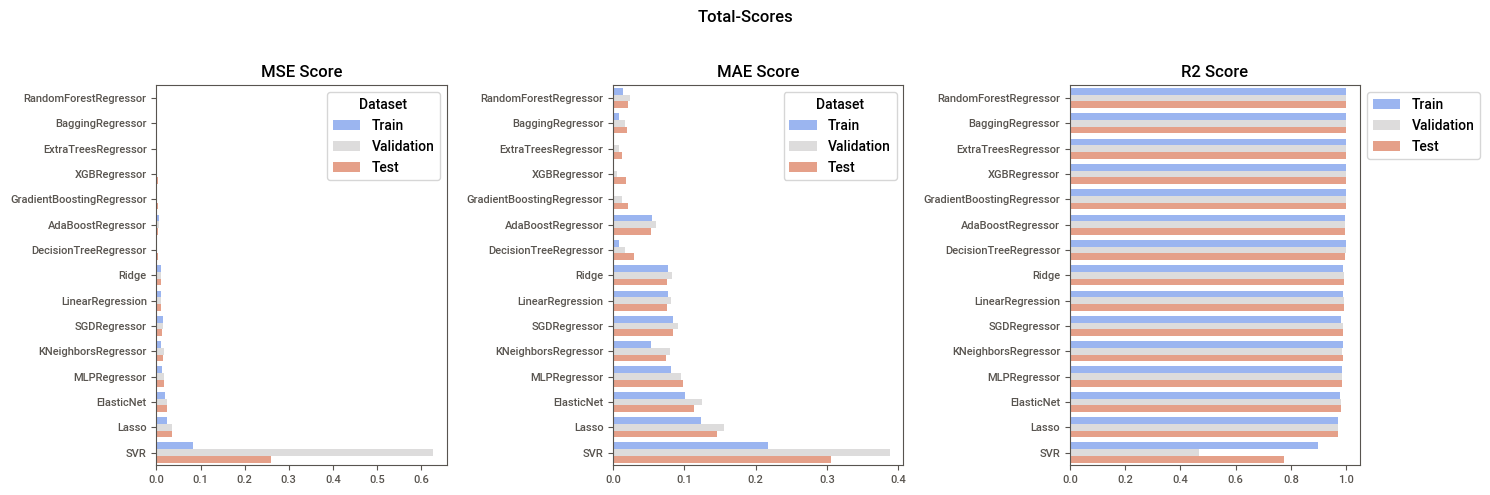

In [193]:
combined_sorted = combined_bar.sort_values(by=['MSE_test','MAE_test','R2_test'])

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=combined_sorted.melt(id_vars = ['Model','Dataset'], value_vars = ['MSE_train','MSE_val','MSE_test']), 
            x='value', y='Model', hue='Dataset',hue_order = ['Train','Validation','Test'], palette='coolwarm' ,ax=axes[0])
axes[0].set_title('MSE Score')
axes[0].set_ylabel('')
axes[0].set_xlabel('')

sns.barplot(data=combined_sorted.melt(id_vars = ['Model','Dataset'], value_vars = ['MAE_train','MAE_val','MAE_test']), 
            x='value', y='Model', hue='Dataset',hue_order = ['Train','Validation','Test'], palette='coolwarm', ax=axes[1])
axes[1].set_title('MAE Score')
axes[1].set_ylabel('')
axes[1].set_xlabel('')

sns.barplot(data=combined_sorted.melt(id_vars = ['Model','Dataset'], value_vars = ['R2_train','R2_val','R2_test']), 
            x='value', y='Model', hue='Dataset',hue_order = ['Train','Validation','Test'], palette='coolwarm', ax=axes[2])
axes[2].set_title('R2 Score')
axes[2].set_ylabel('')
axes[2].set_xlabel('')
axes[2].legend(loc='upper left', bbox_to_anchor=(1, 1))

fig.suptitle('Total-Scores')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [194]:
print(ML(model[2], RF_params))


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Grid Search Time: -1724850336166.27 seconds
***** RandomForestRegressor *****
Cross-validation MSE (Training): 0.01
Grid Search Best Score (negative MSE): -0.01
Training Time: -1724850338545.86 seconds
Validation Time: -1724850338550.49 seconds
Test Time: -1724850338555.50 seconds
*****RandomForestRegressor*****
Stage: Training

MSE: 0.00

MAE: 0.01

R^2 Score: 1.00


*****RandomForestRegressor*****
Stage: Validation

MSE: 0.00

MAE: 0.02

R^2 Score: 1.00


*****RandomForestRegressor*****
Stage: Test

MSE: 0.00

MAE: 0.02

R^2 Score: 1.00


None


In [199]:
X = data.drop(['user_id','loyalty_score'], axis = 1)
y = data['loyalty_score']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size=0.625, random_state=42)

In [200]:
RF_model = RandomForestRegressor(random_state = 42)
RF_model.fit(X_train,y_train)
y_predict = RF_model.predict(X_test)


In [203]:
X_test['x test predict'] = np.round(y_predict,1)
X_test['y test predict'] = y_test

In [204]:
X_test.head(5)

,age,annual_income,purchase_amount,region,purchase_frequency,x test predict,y test predict
115,54,74000,630,2,27,9.4,9.4
15,23,31000,160,1,11,3.5,3.2
212,51,71000,600,3,25,9.0,9.0
126,50,70000,600,1,25,9.0,9.0
6,36,54000,400,3,19,6.5,6.5


In [211]:
def Loyalty_score_predict(): 
    print('*********Input Please*********\n')
    
    age = int(input('Age : '))
    income = int(input('Annual_Income : '))
    purchase_amount = int(input('Purchase_Amount : '))
    region = int(input('Region (1 = North, 2 = South, 3 = West, 4 = East) : '))
    purchase_frequency = int(input('Purchase_Frequency : '))
    
    input_data = [[age, income, purchase_amount, region, purchase_frequency]]
    
    Customer_Loyalty_Score = RF_model.predict(input_data)
    
    print(f'Predicted Loyalty Score : {np.round(Customer_Loyalty_Score,1)} ')
    print('Age : ', age)
    print('Annual Income : ',income)
    print('Pruchase Amount : ', purchase_amount)
    print('Region : ', region)
    print('Purchase Frequency :', purchase_frequency)

# 함수 호출
Loyalty_score_predict()


*********Input Please*********

Predicted Loyalty Score : [7.9] 
Age :  20
Annual Income :  70000
Pruchase Amount :  600
Region :  1
Purchase Frequency : 25


In [213]:
Loyalty_score_predict()

*********Input Please*********

Predicted Loyalty Score : [8.] 
Age :  30
Annual Income :  70000
Pruchase Amount :  600
Region :  1
Purchase Frequency : 25


In [214]:
Loyalty_score_predict()

*********Input Please*********

Predicted Loyalty Score : [8.6] 
Age :  40
Annual Income :  70000
Pruchase Amount :  600
Region :  1
Purchase Frequency : 25
